In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, log_loss
from sklearn import neighbors, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from mlxtend.evaluate import combined_ftest_5x2cv, mcnemar, mcnemar_table

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

# Data set

In [3]:
train = pd.read_csv("location_train.csv")
test = pd.read_csv("location_test.csv")
train.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
X_train = train.drop(["ID", "class"], axis=1)
y_train = train["class"]

0       11
1        3
2        9
3        8
4        3
        ..
3995     2
3996    27
3997    15
3998    19
3999    25
Name: class, Length: 4000, dtype: int64

In [12]:
y_train.head()

pandas.core.series.Series

# Exploration

## Overview

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 446 entries, 1 to 446
dtypes: int64(446)
memory usage: 13.6 MB


In [17]:
X_train.isnull().sum().sum()

1      0
2      0
3      0
4      0
5      0
      ..
442    0
443    0
444    0
445    0
446    0
Length: 446, dtype: int64

## Plots

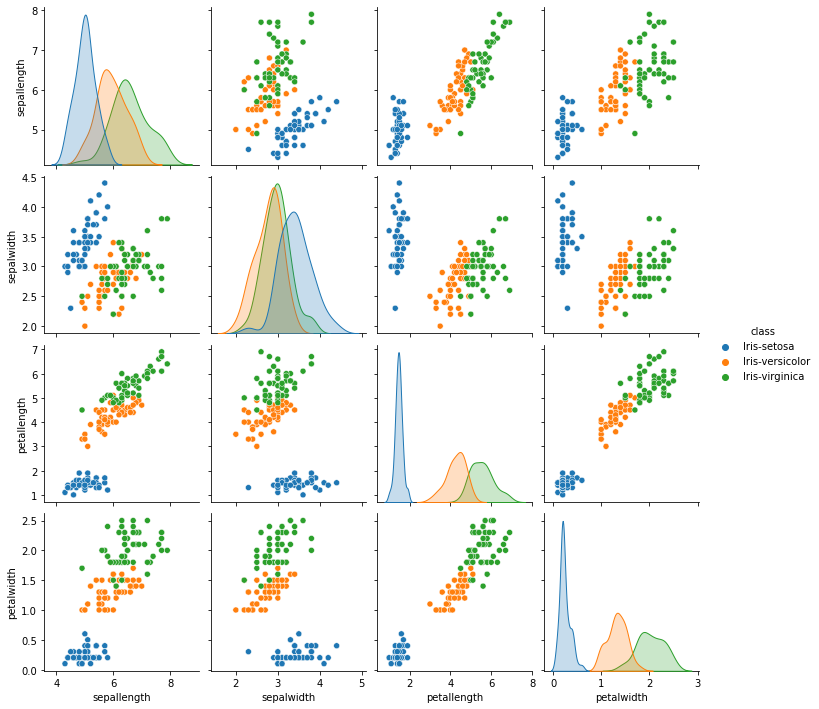

In [10]:
# [TODO]

# Pre-processing

## Feature selection

In [13]:
# [TODO]

## Feature scaling

In [14]:
# [TODO]

## Encoding

In [15]:
# [TODO]

# Model selection

## K-Nearest Neighbor

In [16]:
knn = {
    # [n_neighbors, weights], first classifier is baseline for significance tests
    "KNN [5, uniform]": neighbors.KNeighborsClassifier(n_neighbors=5),
    "KNN [5, distance]": neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance"),
    "KNN [1, uniform]": neighbors.KNeighborsClassifier(n_neighbors=1),
    "KNN [1, distance]": neighbors.KNeighborsClassifier(n_neighbors=1, weights="distance"),
    "KNN [10, uniform]": neighbors.KNeighborsClassifier(n_neighbors=10),
    "KNN [10, distance]": neighbors.KNeighborsClassifier(n_neighbors=10, weights="distance"),
    "KNN [15, uniform]": neighbors.KNeighborsClassifier(n_neighbors=15),
    "KNN [15, distance]": neighbors.KNeighborsClassifier(n_neighbors=15, weights="distance"),
    "KNN [30, uniform]": neighbors.KNeighborsClassifier(n_neighbors=15),
    "KNN [30, distance]": neighbors.KNeighborsClassifier(n_neighbors=15, weights="distance")
}


## Decision Tree

In [17]:
rnd = 5
decision_tree = {
    # [criterion, splitter, max_depth], first classifier is baseline for significance tests
    "Decision Tree [gini, best, none]": DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, random_state=rnd),
    "Decision Tree [entropy, best, none]": DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=None, random_state=rnd),
    "Decision Tree [gini, random, none]": DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=None, random_state=rnd),
    "Decision Tree [gini, best, 5]": DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=5, random_state=rnd),
    "Decision Tree [entropy, best, 5]": DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=5, random_state=rnd),
    "Decision Tree [gini, random, 5]": DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=5, random_state=rnd),
    "Decision Tree [gini, best, 10]": DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, random_state=rnd),
    "Decision Tree [entropy, best, 10]": DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=10, random_state=rnd),
    "Decision Tree [gini, random, 10]": DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=10, random_state=rnd)
}

# don't use Decision Tree because it is similar to Random Forest

## Random Forest

In [18]:
rnd = 5
random_forest = {
    # [n_estimators, criterion, max_depth], first classifier is baseline for significance tests
    "Random Forest [100, gini, none]": RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, random_state=rnd),
    "Random Forest [300, gini, none]": RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=None, random_state=rnd),
    "Random Forest [600, gini, none]": RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=None, random_state=rnd),
    "Random Forest [100, entropy, none]": RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, random_state=rnd),
    "Random Forest [300, entropy, none]": RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=None, random_state=rnd),
    "Random Forest [600, entropy, none]": RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=None, random_state=rnd),
    "Random Forest [100, gini, 10]": RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, random_state=rnd),
    "Random Forest [300, gini, 10]": RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=10, random_state=rnd),
    "Random Forest [600, gini, 10]": RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=10, random_state=rnd),
    "Random Forest [100, entropy, 10]": RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, random_state=rnd),
    "Random Forest [300, entropy, 10]": RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=10, random_state=rnd),
    "Random Forest [600, entropy, 10]": RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=10, random_state=rnd)
}

## Support Vector Machines

In [19]:
rnd = 5
svm = {
    # [regularization, gamma], first classifier is baseline for significance tests
    "SVM [1, scale]": svm.SVC(C=1.0, gamma="scale", random_state=rnd),
    "SVM [0.1, scale]": svm.SVC(C=0.1, gamma="scale", random_state=rnd),
    "SVM [10, scale]": svm.SVC(C=10.0, gamma="scale", random_state=rnd),
    "SVM [1, 1]": svm.SVC(C=1.0, gamma=1.0, random_state=rnd),
    "SVM [0.1, 1]": svm.SVC(C=0.1, gamma=1.0, random_state=rnd),
    "SVM [10, 1]": svm.SVC(C=10.0, gamma=1.0, random_state=rnd)
}

# SVMs are extremely slow on big datasets (e.g. phishing)

In [20]:
classifiers = [knn, random_forest, svm]

# Training and validation

## Hold-out

In [21]:
def holdout(clf, X_train, y_train, test_size, baseline_model):
    start = timeit.default_timer()

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=30)
    model = clf.fit(X_train, y_train)

    # performance
    accuracy = accuracy_score(y_val, model.predict(X_val))
    recall = recall_score(y_val, model.predict(X_val), average="macro")
    f1 = f1_score(y_val, model.predict(X_val), average="macro")

    stop = timeit.default_timer()
    runtime = stop - start

    # significance test (5x2cv combined F test)
    _, p = combined_ftest_5x2cv(baseline_model, model, X_train, y_train, random_seed=1)

    return([accuracy, recall, f1, p, runtime])

## Cross-validation

In [22]:
def cross_validation(clf, X_train, y_train, cv, baseline_model):
    start = timeit.default_timer()
    
    model = clf.fit(X_train, y_train)

    # performance
    accuracy = cross_val_score(model, X=X_train, y=y_train, scoring="accuracy", cv=cv)
    recall = cross_val_score(model, X=X_train, y=y_train, scoring="recall_macro", cv=cv)
    f1 = cross_val_score(model, X=X_train, y=y_train, scoring="f1_macro", cv=cv)

    stop = timeit.default_timer()
    runtime = stop - start

    # significance test (5x2cv combined F test)
    _, p = combined_ftest_5x2cv(baseline_model, model, X_train, y_train, random_seed=1)

    return([np.mean(accuracy), np.mean(recall), np.mean(f1), p, runtime])


## Baseline

In [23]:
def baseline(clf, X_train, y_train):
    start = timeit.default_timer()

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=30)
    model = clf.fit(X_train, y_train)

    stop = timeit.default_timer()
    runtime = stop - start

    # performance
    accuracy = accuracy_score(y_val, model.predict(X_val))
    recall = recall_score(y_val, model.predict(X_val), average="macro")
    f1 = f1_score(y_val, model.predict(X_val), average="macro")

    return([accuracy, recall, f1, 0, runtime, model])

# Results

In [24]:
def evaluate_classifiers(classifiers, X_train, y_train):
    # classifiers = dictonary of classifier
    # X_train = training features after pre-processing before split
    # y_train = training targets after pre-processing before split
    
    performance = list()

    for clf_dict in classifiers:
        # baseline
        key = next(iter(clf_dict))
        baseline_clf = clf_dict[list(clf_dict.keys())[0]]   # set first classifier (default settings) of each class as baseline
        accuracy, recall, f1, p, runtime, baseline_model = baseline(baseline_clf, X_train, y_train)
        performance.append(["{} [B]".format(key), key[0], "hold-out", 0.25, accuracy, recall, f1, p, runtime])
        
        for i, (key, clf) in enumerate(clf_dict.items()):
            print(key)

            # hold-out
            for test_size in [0.2, 0.3, 0.4]:
                accuracy, recall, f1, p, runtime = holdout(clf, X_train, y_train, test_size, baseline_model)
                performance.append([key, key[0], "hold-out", test_size, accuracy, recall, f1, p, runtime])
                
            # cross-validation
            for cv in [5, 10]:
                accuracy, recall, f1, p, runtime = cross_validation(clf, X_train, y_train, cv, baseline_model)
                performance.append([key, key[0], "cross", cv, accuracy, recall, f1, p, runtime])

    print("DONE!")

    return(performance)

results = evaluate_classifiers(classifiers, X_scaled, y_encoded)

KNN [5, uniform]
KNN [5, distance]
KNN [1, uniform]
KNN [1, distance]
KNN [10, uniform]
KNN [10, distance]
KNN [15, uniform]
KNN [15, distance]
KNN [30, uniform]
KNN [30, distance]
Random Forest [100, gini, none]
Random Forest [300, gini, none]
Random Forest [600, gini, none]
Random Forest [100, entropy, none]
Random Forest [300, entropy, none]
Random Forest [600, entropy, none]
Random Forest [100, gini, 10]
Random Forest [300, gini, 10]
Random Forest [600, gini, 10]
Random Forest [100, entropy, 10]
Random Forest [300, entropy, 10]
Random Forest [600, entropy, 10]
SVM [1, scale]
SVM [0.1, scale]
SVM [10, scale]
SVM [1, 1]
SVM [0.1, 1]
SVM [10, 1]
DONE!


In [25]:
performance = pd.DataFrame(results, columns=["Classifier", "Type", "Validation", "Split", "Accuracy", "Recall (macro)", "F1 (macro)", "p-value", "Runtime"])

knn_performance = performance[performance["Type"] == "K"]
rf_performance = performance[performance["Type"] == "R"]
svm_performance = performance[performance["Type"] == "S"]

## Tables

In [26]:
np.round(performance, 4)

,Classifier,Type,Validation,Split,Accuracy,Recall (macro),F1 (macro),p-value,Runtime
0,"KNN [5, uniform] [B]",K,hold-out,0.25,0.9474,0.9475,0.9475,0.0000,0.0015
1,"KNN [5, uniform]",K,hold-out,0.20,0.9000,0.8889,0.8885,NaN,0.0051
2,"KNN [5, uniform]",K,hold-out,0.30,0.9333,0.9312,0.9344,NaN,0.0058
3,"KNN [5, uniform]",K,hold-out,0.40,0.9167,0.9278,0.9242,NaN,0.0062
4,"KNN [5, uniform]",K,cross,5.00,0.9600,0.9600,0.9598,NaN,0.0289
...,...,...,...,...,...,...,...,...,...
138,"SVM [10, 1]",S,hold-out,0.20,0.9333,0.9259,0.9259,0.7170,0.0030
139,"SVM [10, 1]",S,hold-out,0.30,0.8667,0.8623,0.8667,0.5552,0.0035
140,"SVM [10, 1]",S,hold-out,0.40,0.9000,0.9139,0.9091,0.6286,0.0028
141,"SVM [10, 1]",S,cross,5.00,0.9533,0.9533,0.9531,0.3150,0.0240


In [27]:
# Which model results are significant within 5% interval?
alpha_5 = performance.loc[performance["p-value"] < 0.05]
np.round(alpha_5, 4)


,Classifier,Type,Validation,Split,Accuracy,Recall (macro),F1 (macro),p-value,Runtime
0,"KNN [5, uniform] [B]",K,hold-out,0.25,0.9474,0.9475,0.9475,0.0000,0.0015
14,"KNN [1, uniform]",K,cross,5.00,0.9467,0.9467,0.9465,0.0182,0.0299
15,"KNN [1, uniform]",K,cross,10.00,0.9533,0.9533,0.9524,0.0182,0.0558
19,"KNN [1, distance]",K,cross,5.00,0.9467,0.9467,0.9465,0.0182,0.0260
20,"KNN [1, distance]",K,cross,10.00,0.9533,0.9533,0.9524,0.0182,0.0553
32,"KNN [15, uniform]",K,hold-out,0.30,0.9333,0.9474,0.9369,0.0248,0.0077
42,"KNN [30, uniform]",K,hold-out,0.30,0.9333,0.9474,0.9369,0.0248,0.0055
51,"Random Forest [100, gini, none] [B]",R,hold-out,0.25,0.9474,0.9475,0.9475,0.0000,0.0776
112,"SVM [1, scale] [B]",S,hold-out,0.25,0.9737,0.9778,0.9740,0.0000,0.0010
118,"SVM [0.1, scale]",S,hold-out,0.20,0.9333,0.9259,0.9250,0.0449,0.0030


In [28]:
drop = ["Split", "Accuracy", "Recall (macro)", "F1 (macro)", "p-value"]
runtime = performance.drop(drop, axis=1)
runtime_stats = runtime.groupby(["Type", "Validation"], sort=False).describe()
np.round(runtime_stats, 4)

Runtime                                                  \
                  count    mean     std     min     25%     50%     75%   
Type Validation                                                           
K    hold-out      31.0  0.0049  0.0017  0.0015  0.0035  0.0049  0.0061   
     cross         20.0  0.0443  0.0180  0.0214  0.0320  0.0415  0.0537   
R    hold-out      37.0  0.1903  0.0820  0.0776  0.0975  0.1914  0.2831   
     cross         24.0  3.8245  2.0737  1.2727  2.5481  3.3475  5.0494   
S    hold-out      19.0  0.0027  0.0006  0.0010  0.0025  0.0028  0.0030   
     cross         12.0  0.0362  0.0122  0.0221  0.0247  0.0352  0.0464   

                         
                    max  
Type Validation          
K    hold-out    0.0085  
     cross       0.0966  
R    hold-out    0.3290  
     cross       7.5621  
S    hold-out    0.0035  
     cross       0.0550

## Plots

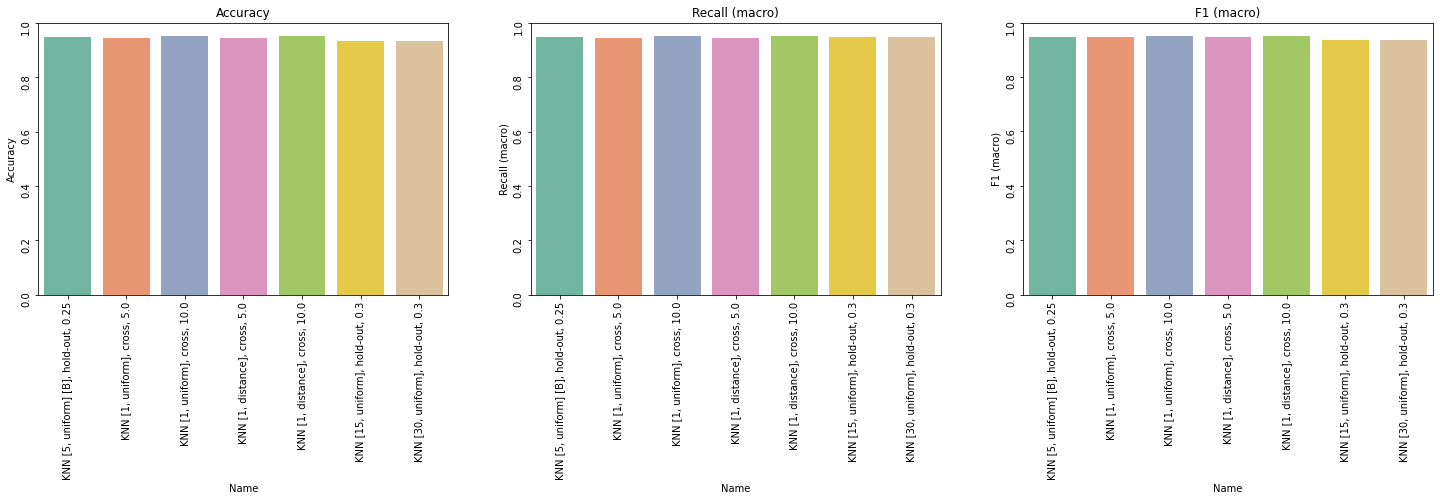

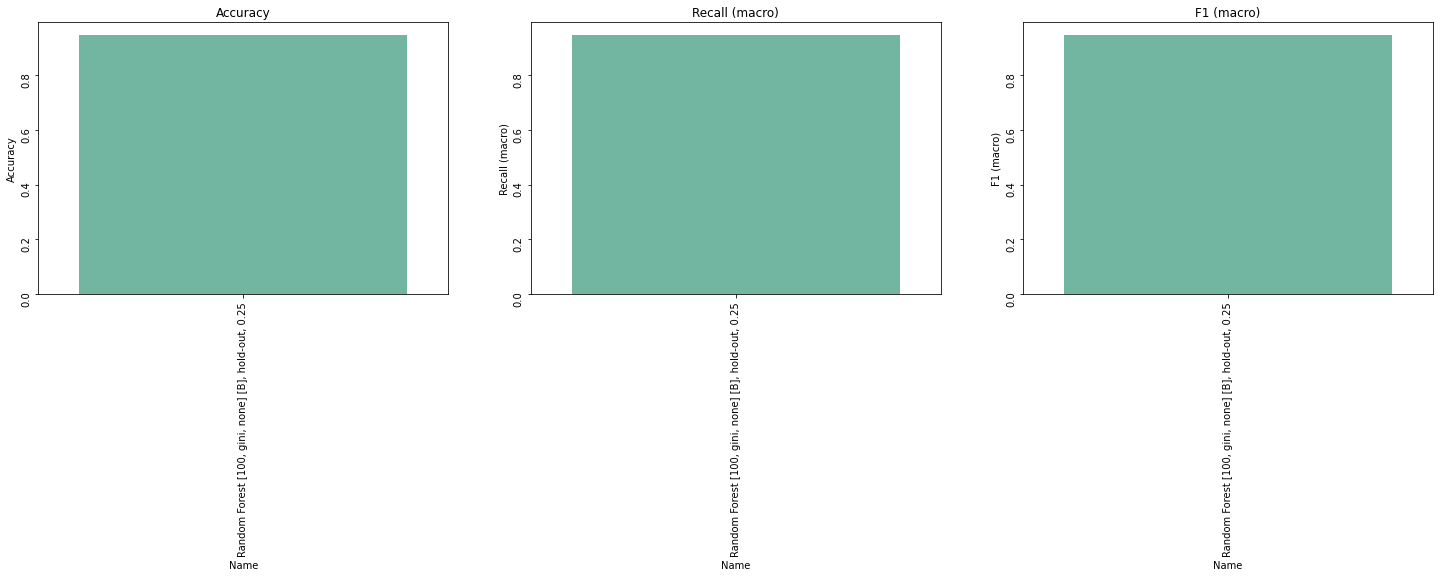

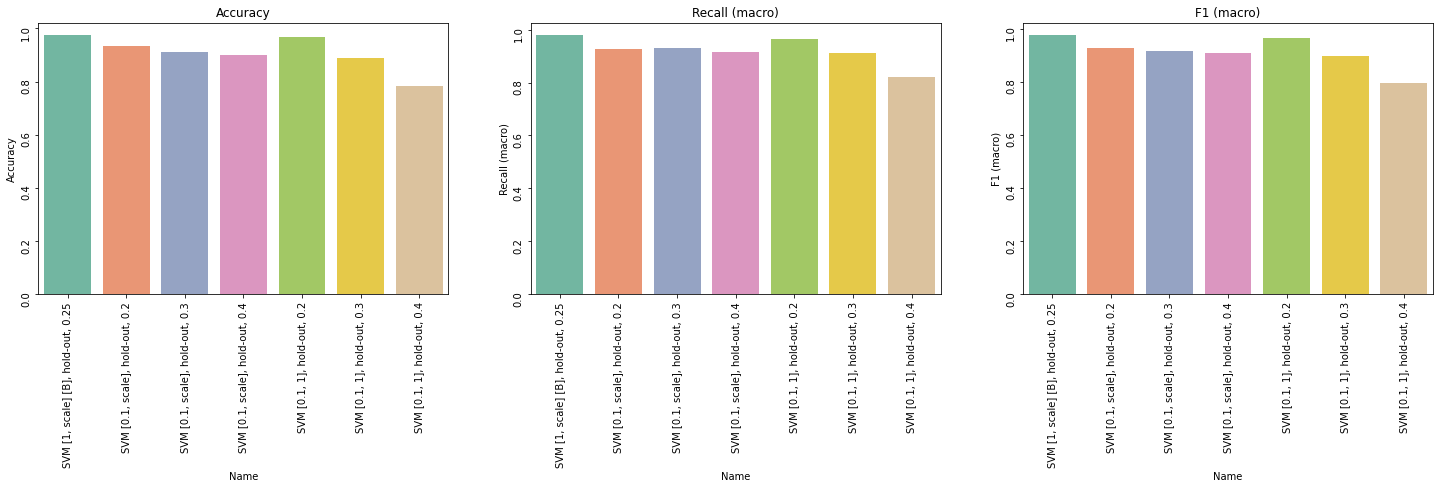

In [29]:
# Plots for significant results and baseline classifier
knn_significant = alpha_5.loc[alpha_5["Type"] == "K"]
rf_significant = alpha_5.loc[alpha_5["Type"] == "R"]
svm_significant = alpha_5.loc[alpha_5["Type"] == "S"]

for d in [knn_significant, rf_significant, svm_significant]:
    d["Name"] = d["Classifier"] + ", " + d["Validation"] + ", " + d["Split"].astype(str)
    fig, axs = plt.subplots(1, 3, figsize=(25, 5))
    sns.barplot(data=d, x="Name", y="Accuracy", palette="Set2", ax=axs[0])
    axs[0].set_title("Accuracy")
    axs[0].tick_params(labelrotation=90)
    sns.barplot(data=d, x="Name", y="Recall (macro)", palette="Set2", ax=axs[1])
    axs[1].set_title("Recall (macro)")
    axs[1].tick_params(labelrotation=90)
    sns.barplot(data=d, x="Name", y="F1 (macro)", palette="Set2", ax=axs[2])
    axs[2].set_title("F1 (macro)")
    axs[2].tick_params(labelrotation=90)

Text(0.5, 1.0, 'SVM')

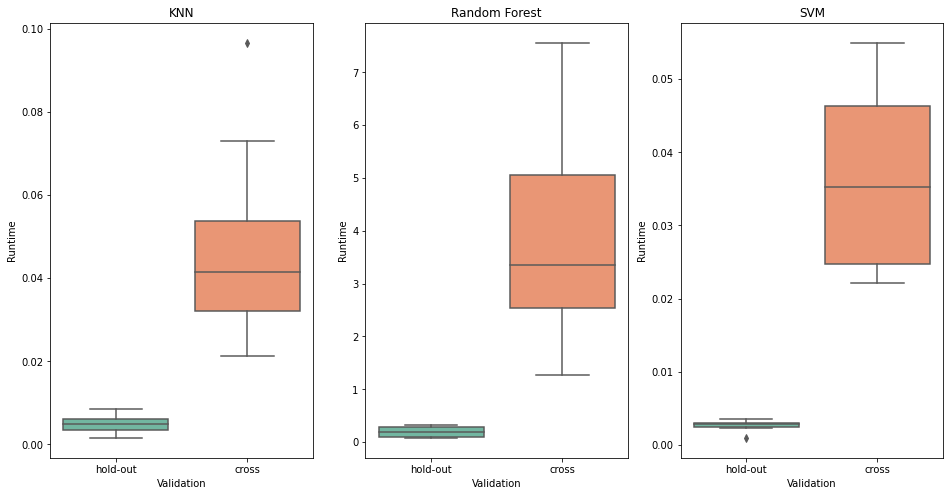

In [30]:
# Runtimes
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
sns.boxplot(data=knn_performance, x="Validation", y="Runtime", palette="Set2", ax=axs[0])
axs[0].set_title("KNN")
sns.boxplot(data=rf_performance, x="Validation", y="Runtime", palette="Set2", ax=axs[1])
axs[1].set_title("Random Forest")
sns.boxplot(data=svm_performance, x="Validation", y="Runtime", palette="Set2", ax=axs[2])
axs[2].set_title("SVM")